In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Load the dataset
cancer = pd.read_csv(r'C:\Users\Asus\Downloads\Cancer.csv')

In [116]:
# Display the first few rows of the dataset
cancer.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,High
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [118]:
# Check for missing values
cancer.isnull().sum()

Patient Id               0
Age                      0
Gender                   0
AirPollution             0
Alcoholuse               0
DustAllergy              0
OccuPationalHazards      0
GeneticRisk              0
chronicLungDisease       0
BalancedDiet             0
Obesity                  0
Smoking                  0
PassiveSmoker            0
ChestPain                0
CoughingofBlood          0
Fatigue                  0
WeightLoss               0
ShortnessofBreath        0
Wheezing                 0
SwallowingDifficulty     0
ClubbingofFingerNails    0
FrequentCold             0
DryCough                 0
Snoring                  0
Level                    0
dtype: int64

In [120]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient Id             1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   int64 
 3   AirPollution           1000 non-null   int64 
 4   Alcoholuse             1000 non-null   int64 
 5   DustAllergy            1000 non-null   int64 
 6   OccuPationalHazards    1000 non-null   int64 
 7   GeneticRisk            1000 non-null   int64 
 8   chronicLungDisease     1000 non-null   int64 
 9   BalancedDiet           1000 non-null   int64 
 10  Obesity                1000 non-null   int64 
 11  Smoking                1000 non-null   int64 
 12  PassiveSmoker          1000 non-null   int64 
 13  ChestPain              1000 non-null   int64 
 14  CoughingofBlood        1000 non-null   int64 
 15  Fatigue               

In [122]:
cancer.Level.value_counts()

Level
High      366
Medium    331
Low       303
Name: count, dtype: int64

In [124]:
cancer = cancer.drop(columns=['Patient Id'])  # Patient ID is not serving as variables so dropping it

In [126]:
# Convert categorical variables to numerical values using Label Encoding
label_encoders = {}
for column in cancer.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    cancer[column] = label_encoders[column].fit_transform(cancer[column])

In [128]:
cancer.head()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,0
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


In [130]:
cancer.Level.value_counts()

Level
0    366
2    331
1    303
Name: count, dtype: int64

Values are encoded as 0: Low; 1: High; 2: Medium

In [133]:
# Split the data into features and target variable
X = cancer.drop(columns=['Level'])  # Assuming 'Level' is the target variable
y = cancer['Level']

In [135]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
# Define the models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [139]:
# Dictionary to store accuracy of each model
model_accuracy = {}

In [141]:
# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracy[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        97

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Support Vector Machine Accuracy: 0.96
Support Vector Machine Classification Report:
          

In [143]:
# Compare model performance
accuracy_cancer = pd.DataFrame.from_dict(model_accuracy, orient='index', columns=['Accuracy'])
accuracy_cancer.sort_values(by='Accuracy', ascending=False, inplace=True)

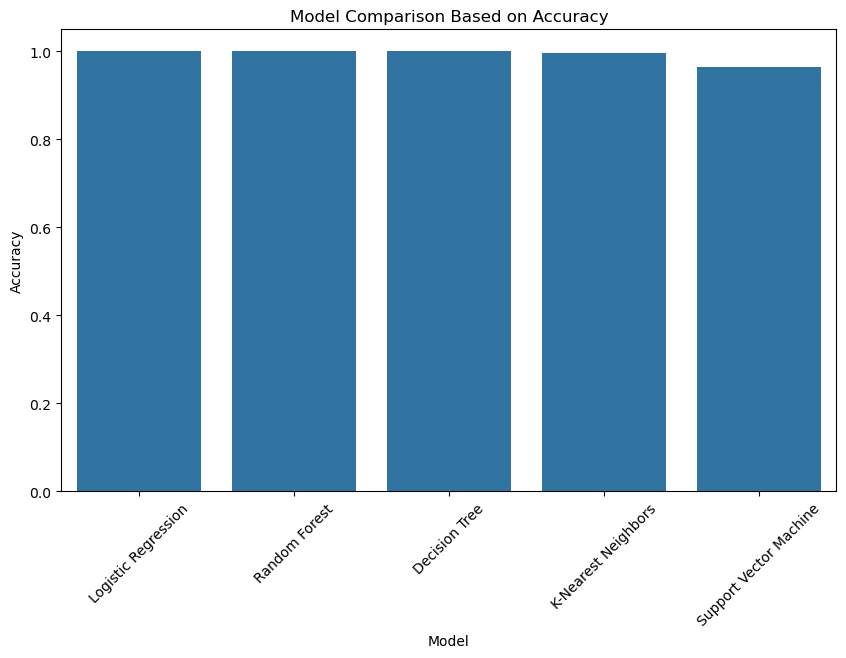

In [149]:
# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_cancer.index, y=accuracy_cancer['Accuracy'])
plt.title('Model Comparison Based on Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [155]:
# Separate the features and target variable
features = cancer.columns[:-1]  # all columns except the last one (assuming it's the target)
target = cancer.columns[-1]  # the last column as the target variable

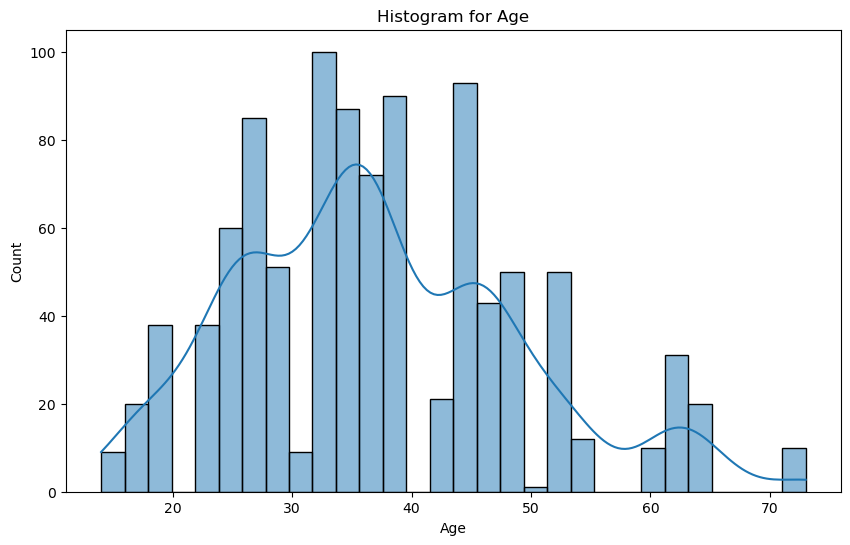

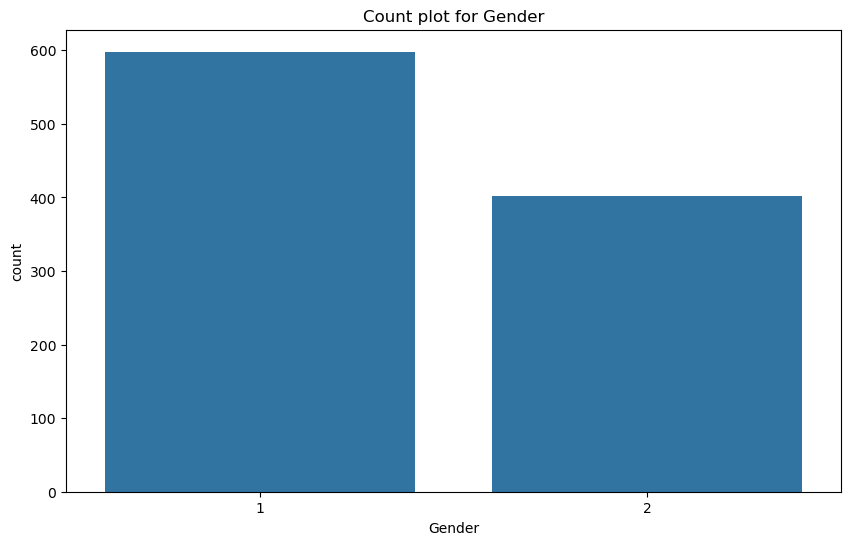

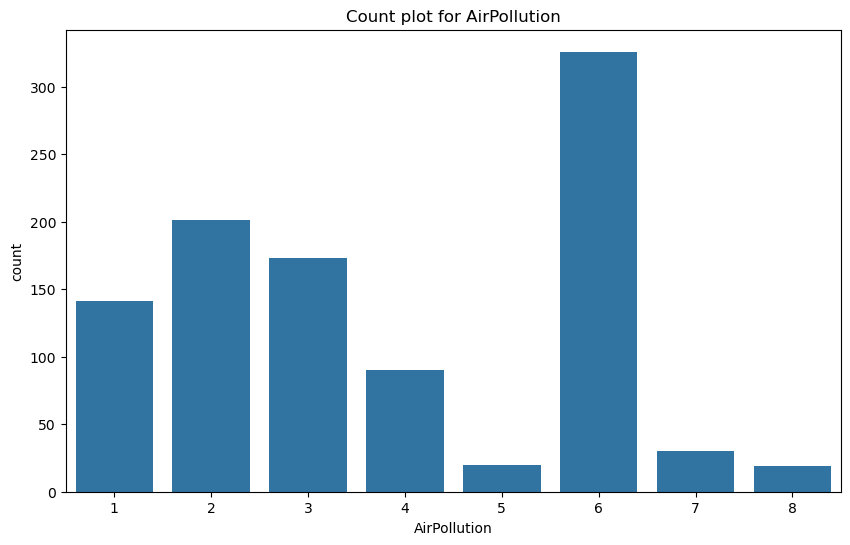

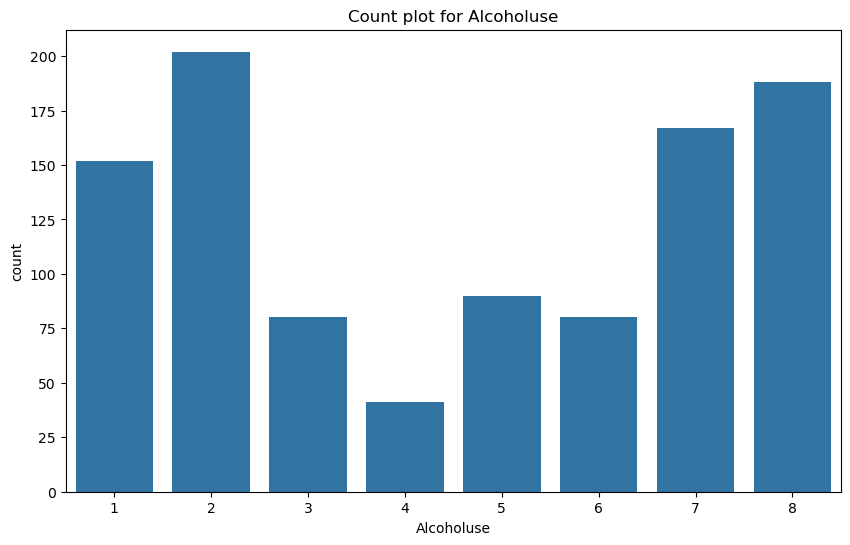

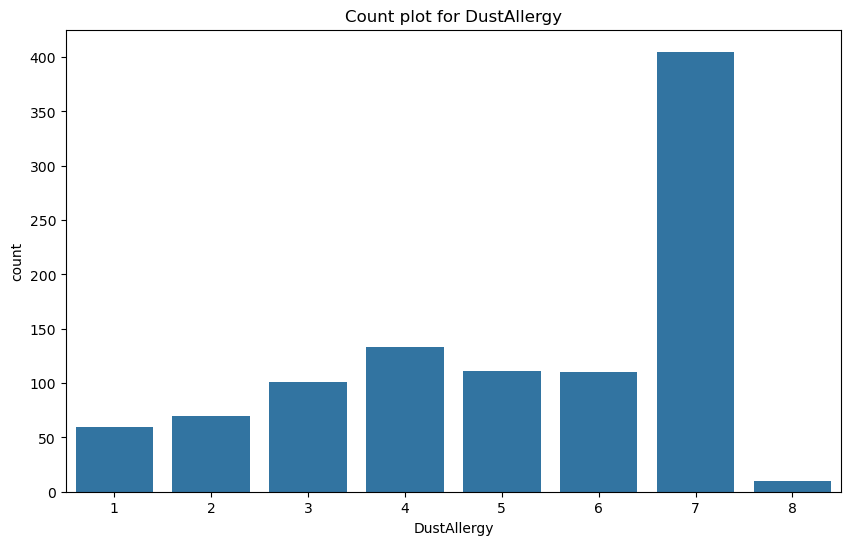

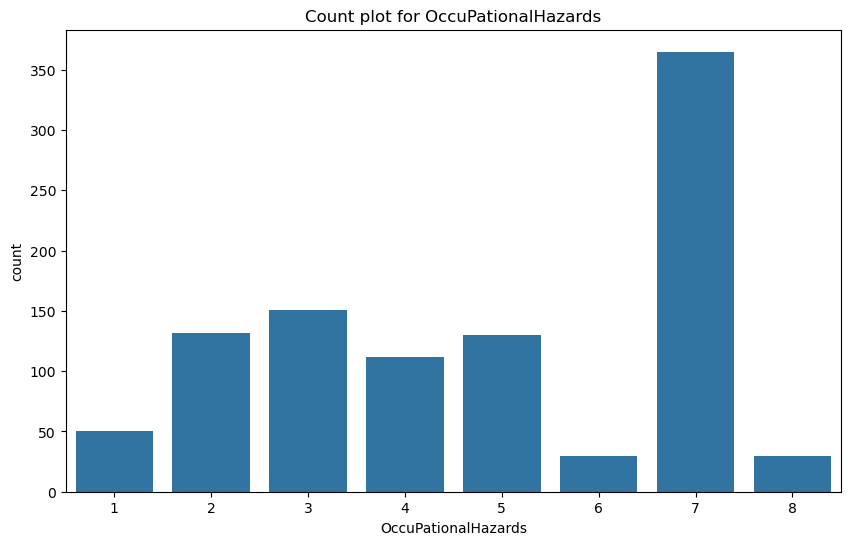

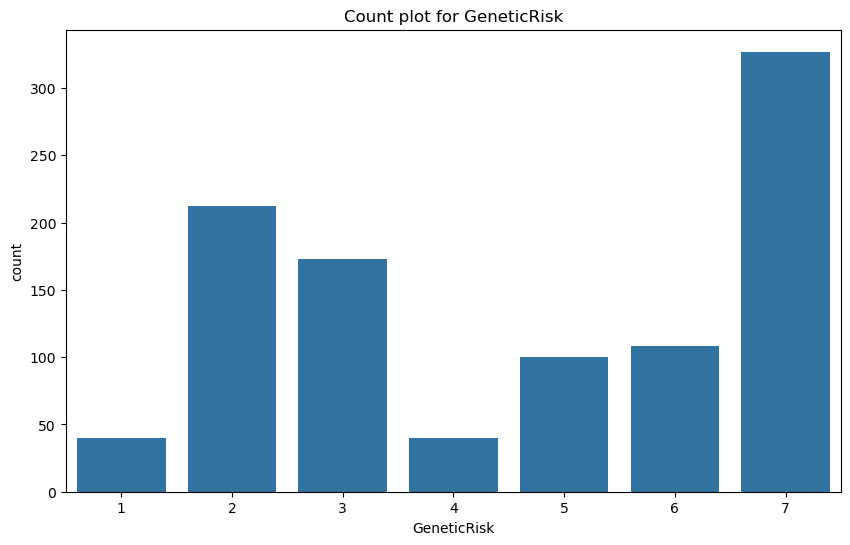

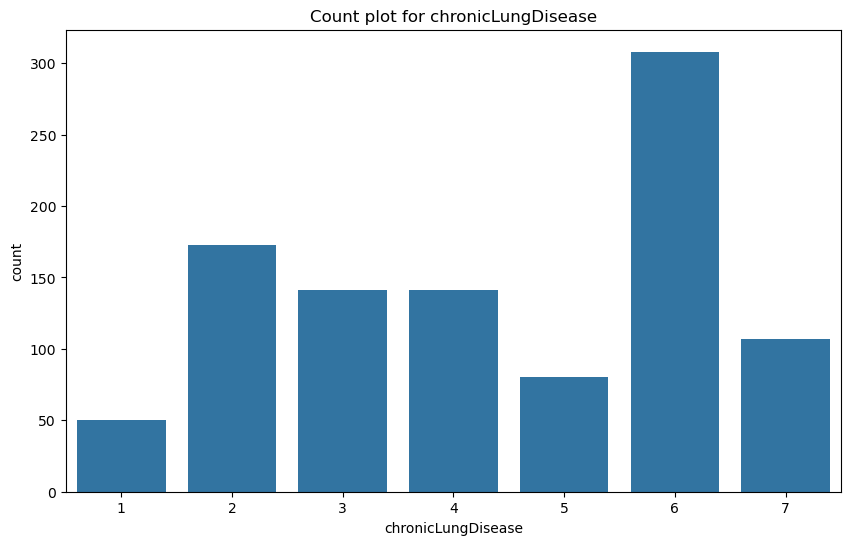

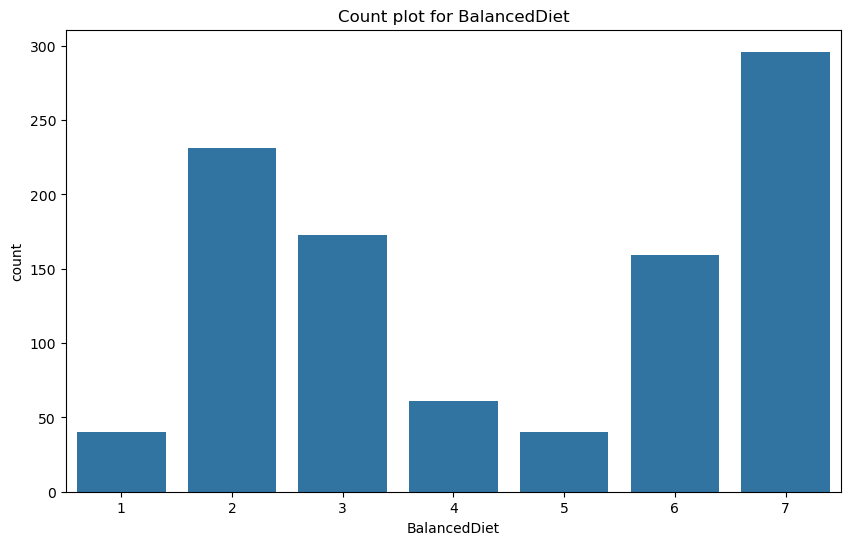

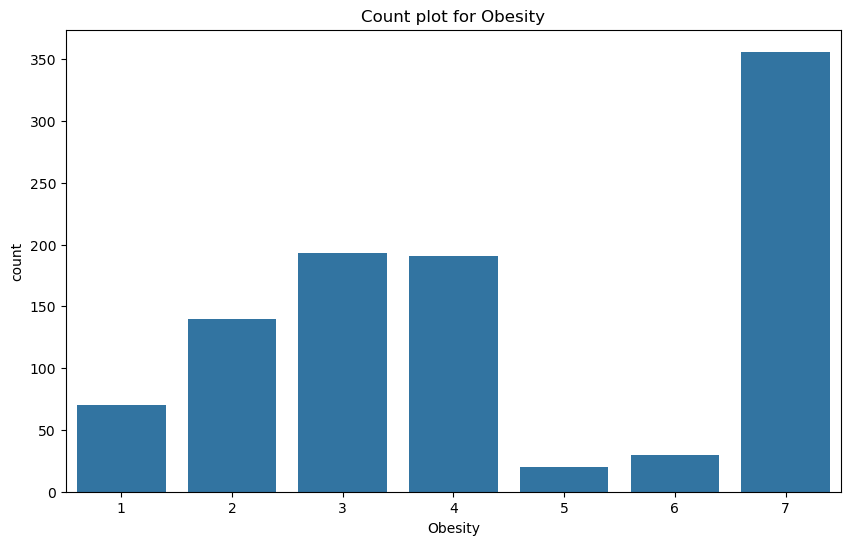

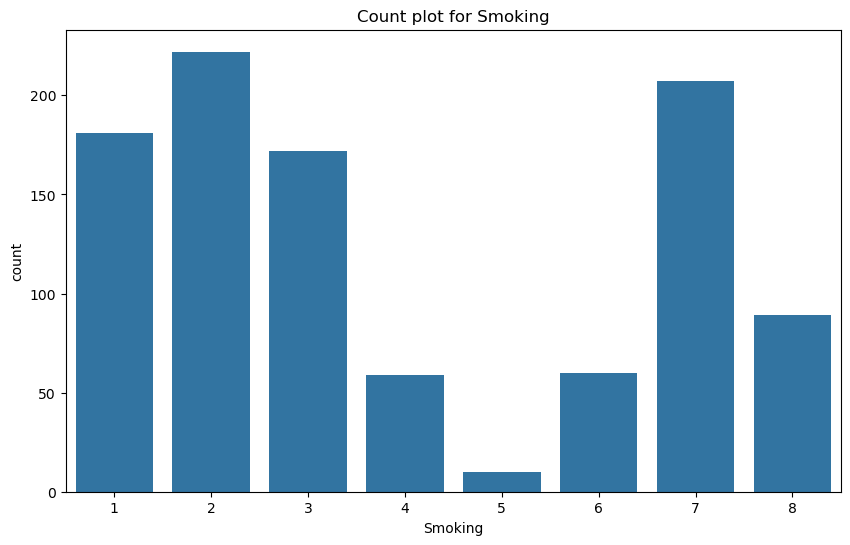

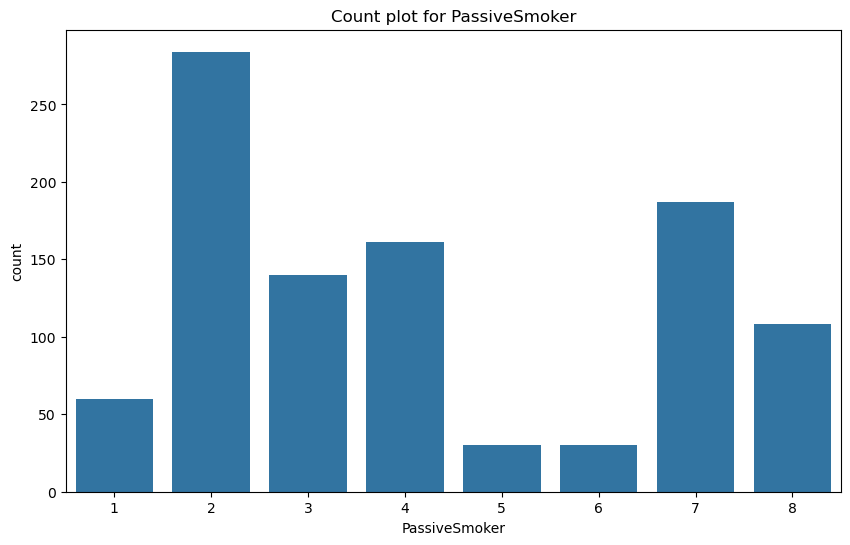

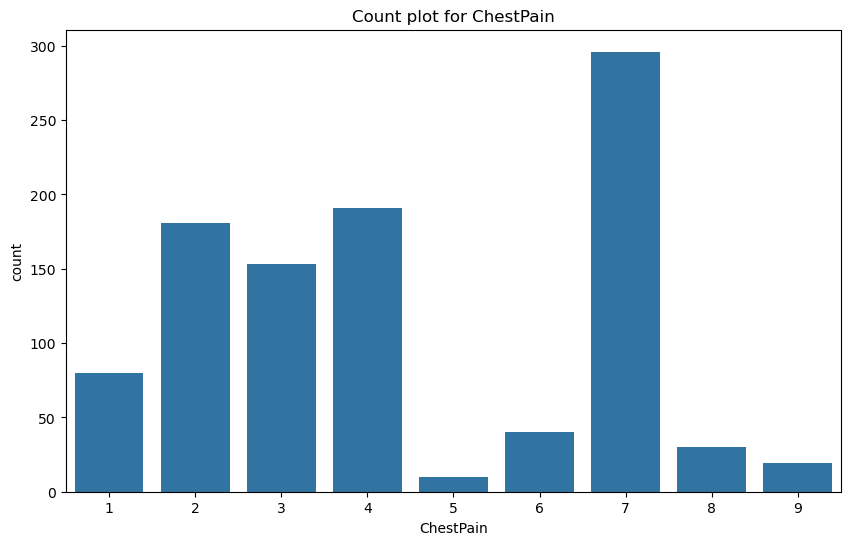

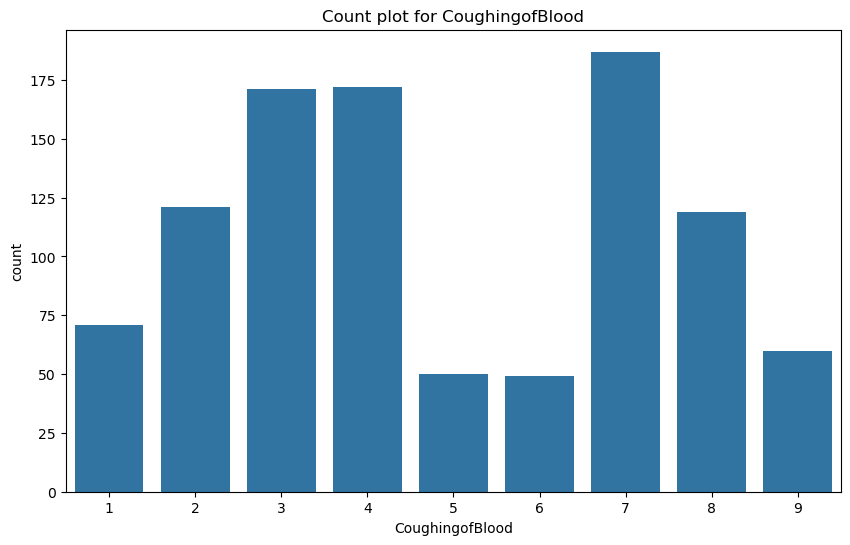

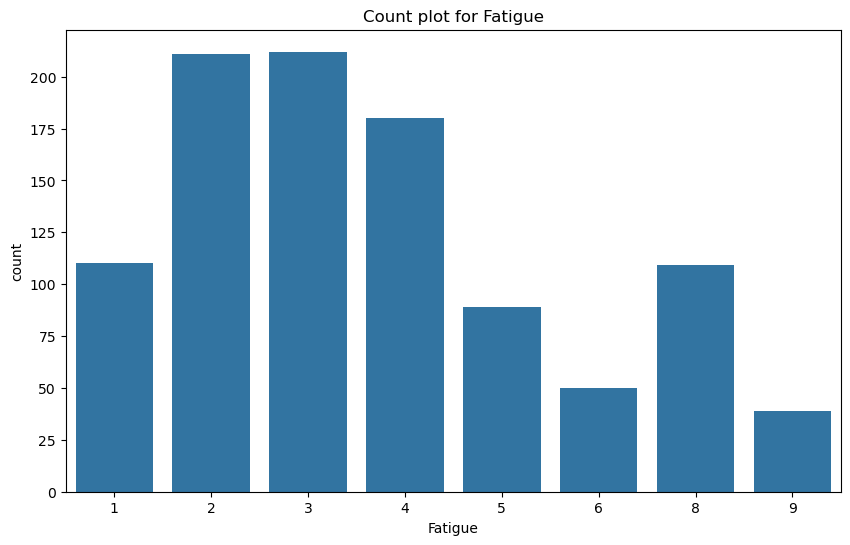

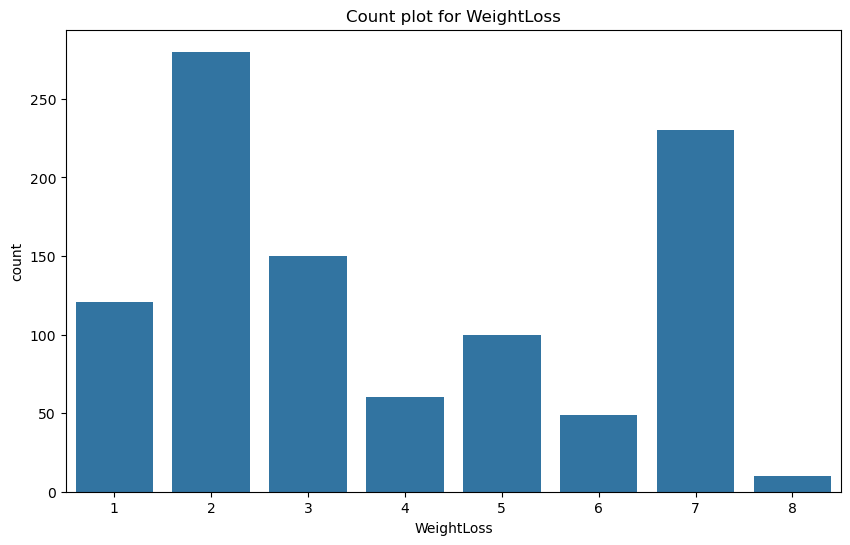

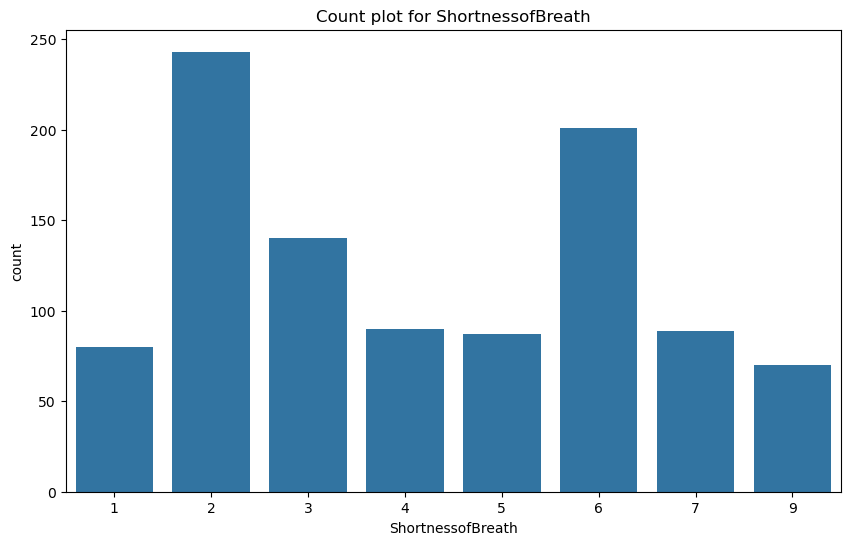

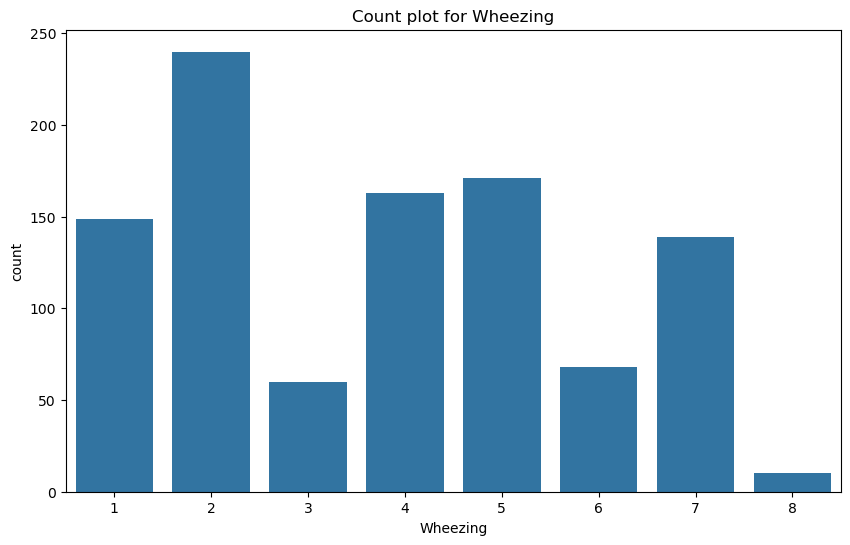

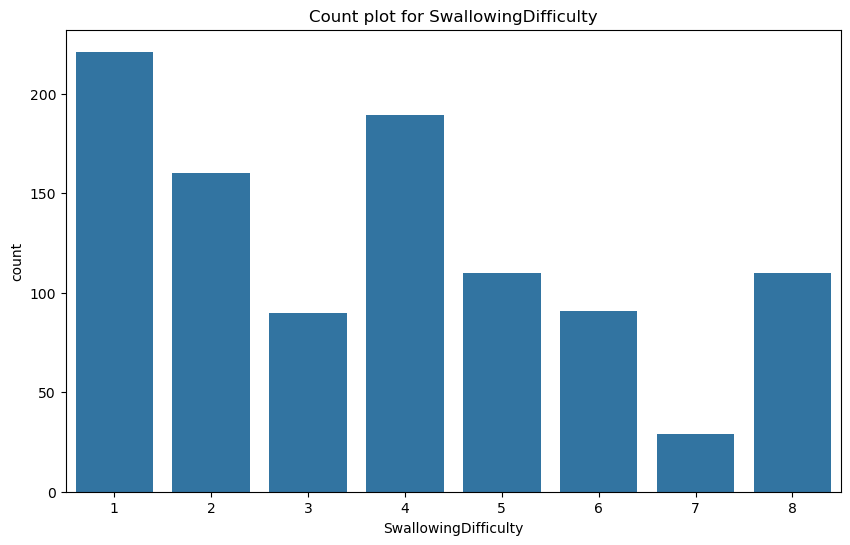

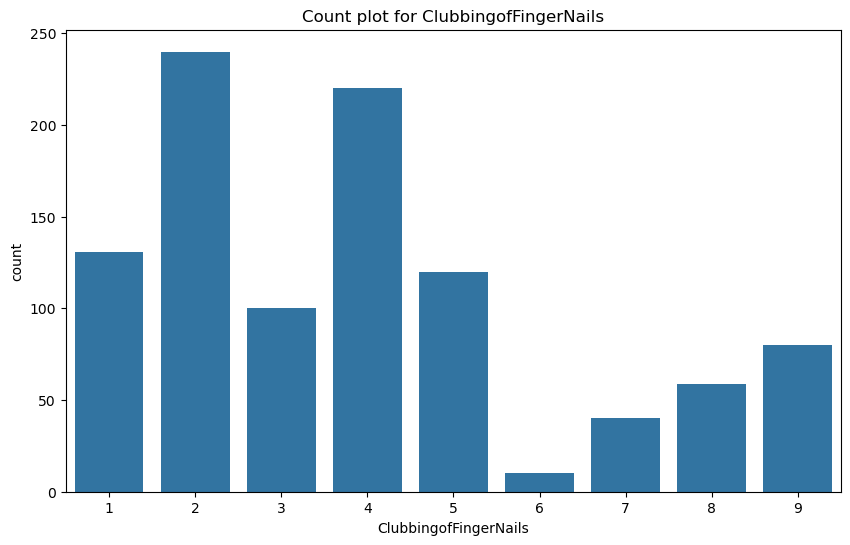

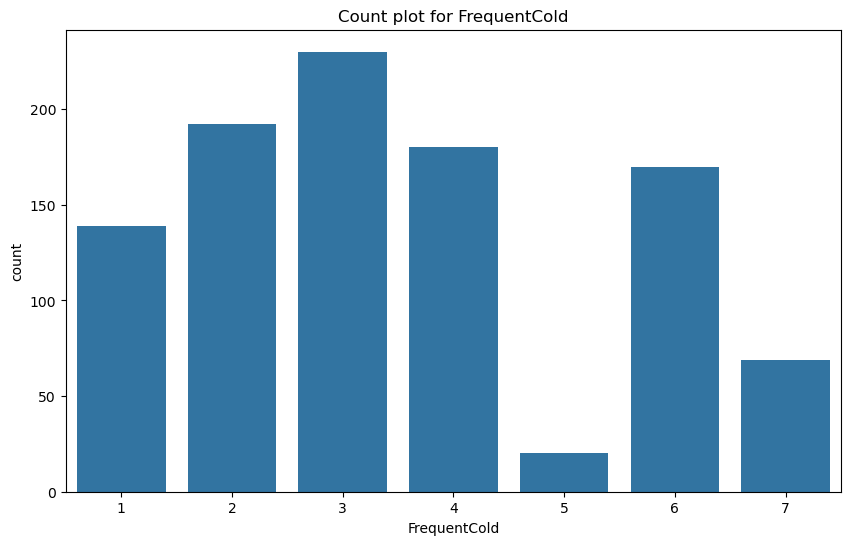

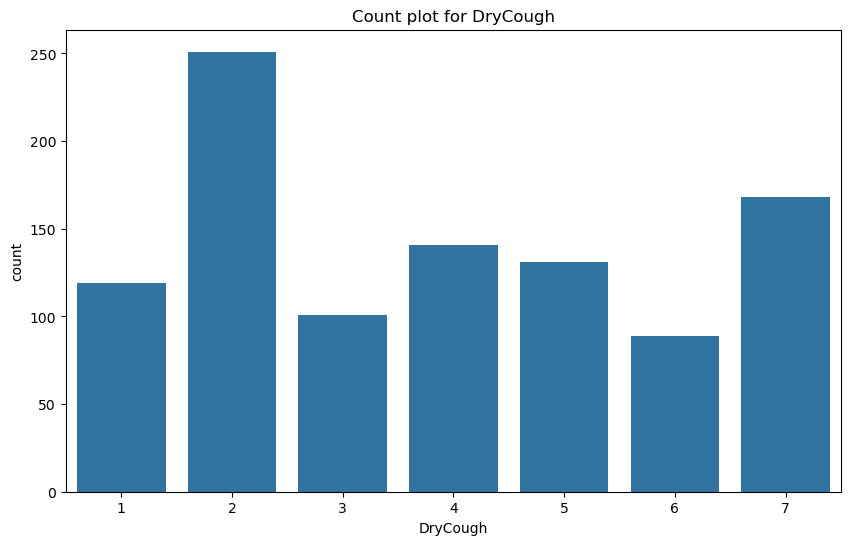

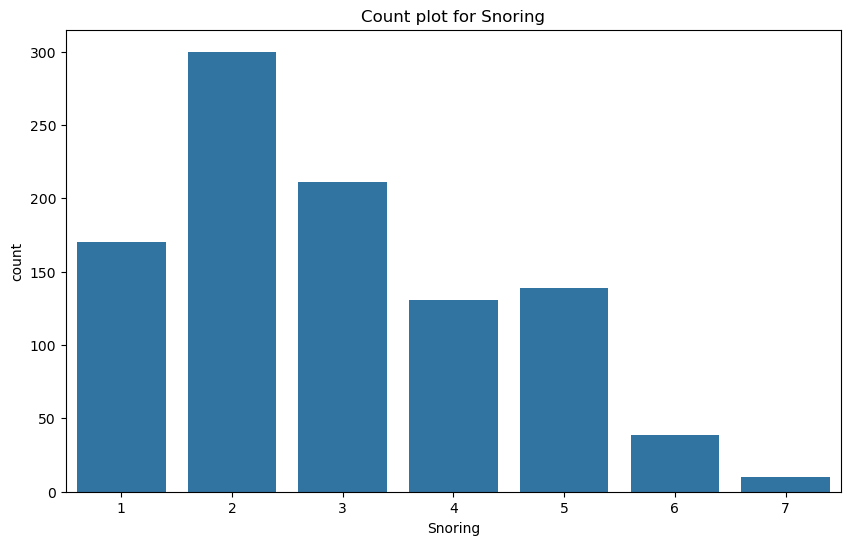

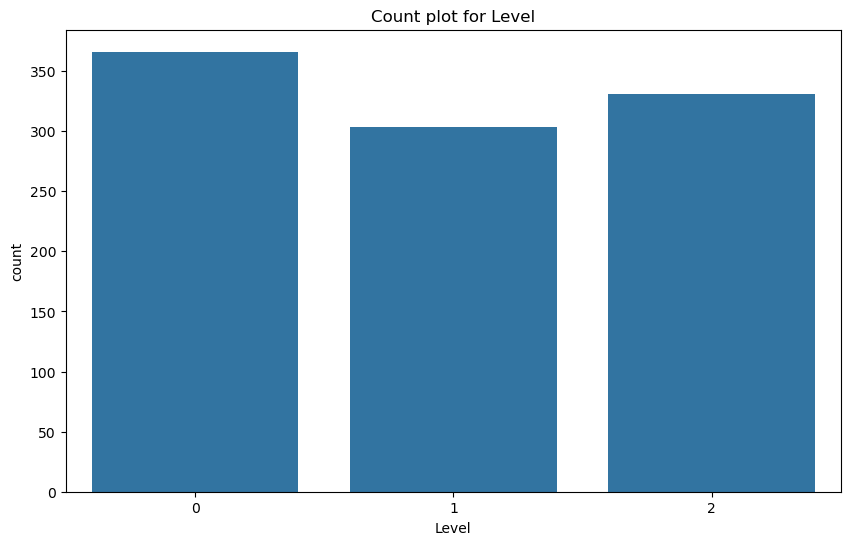

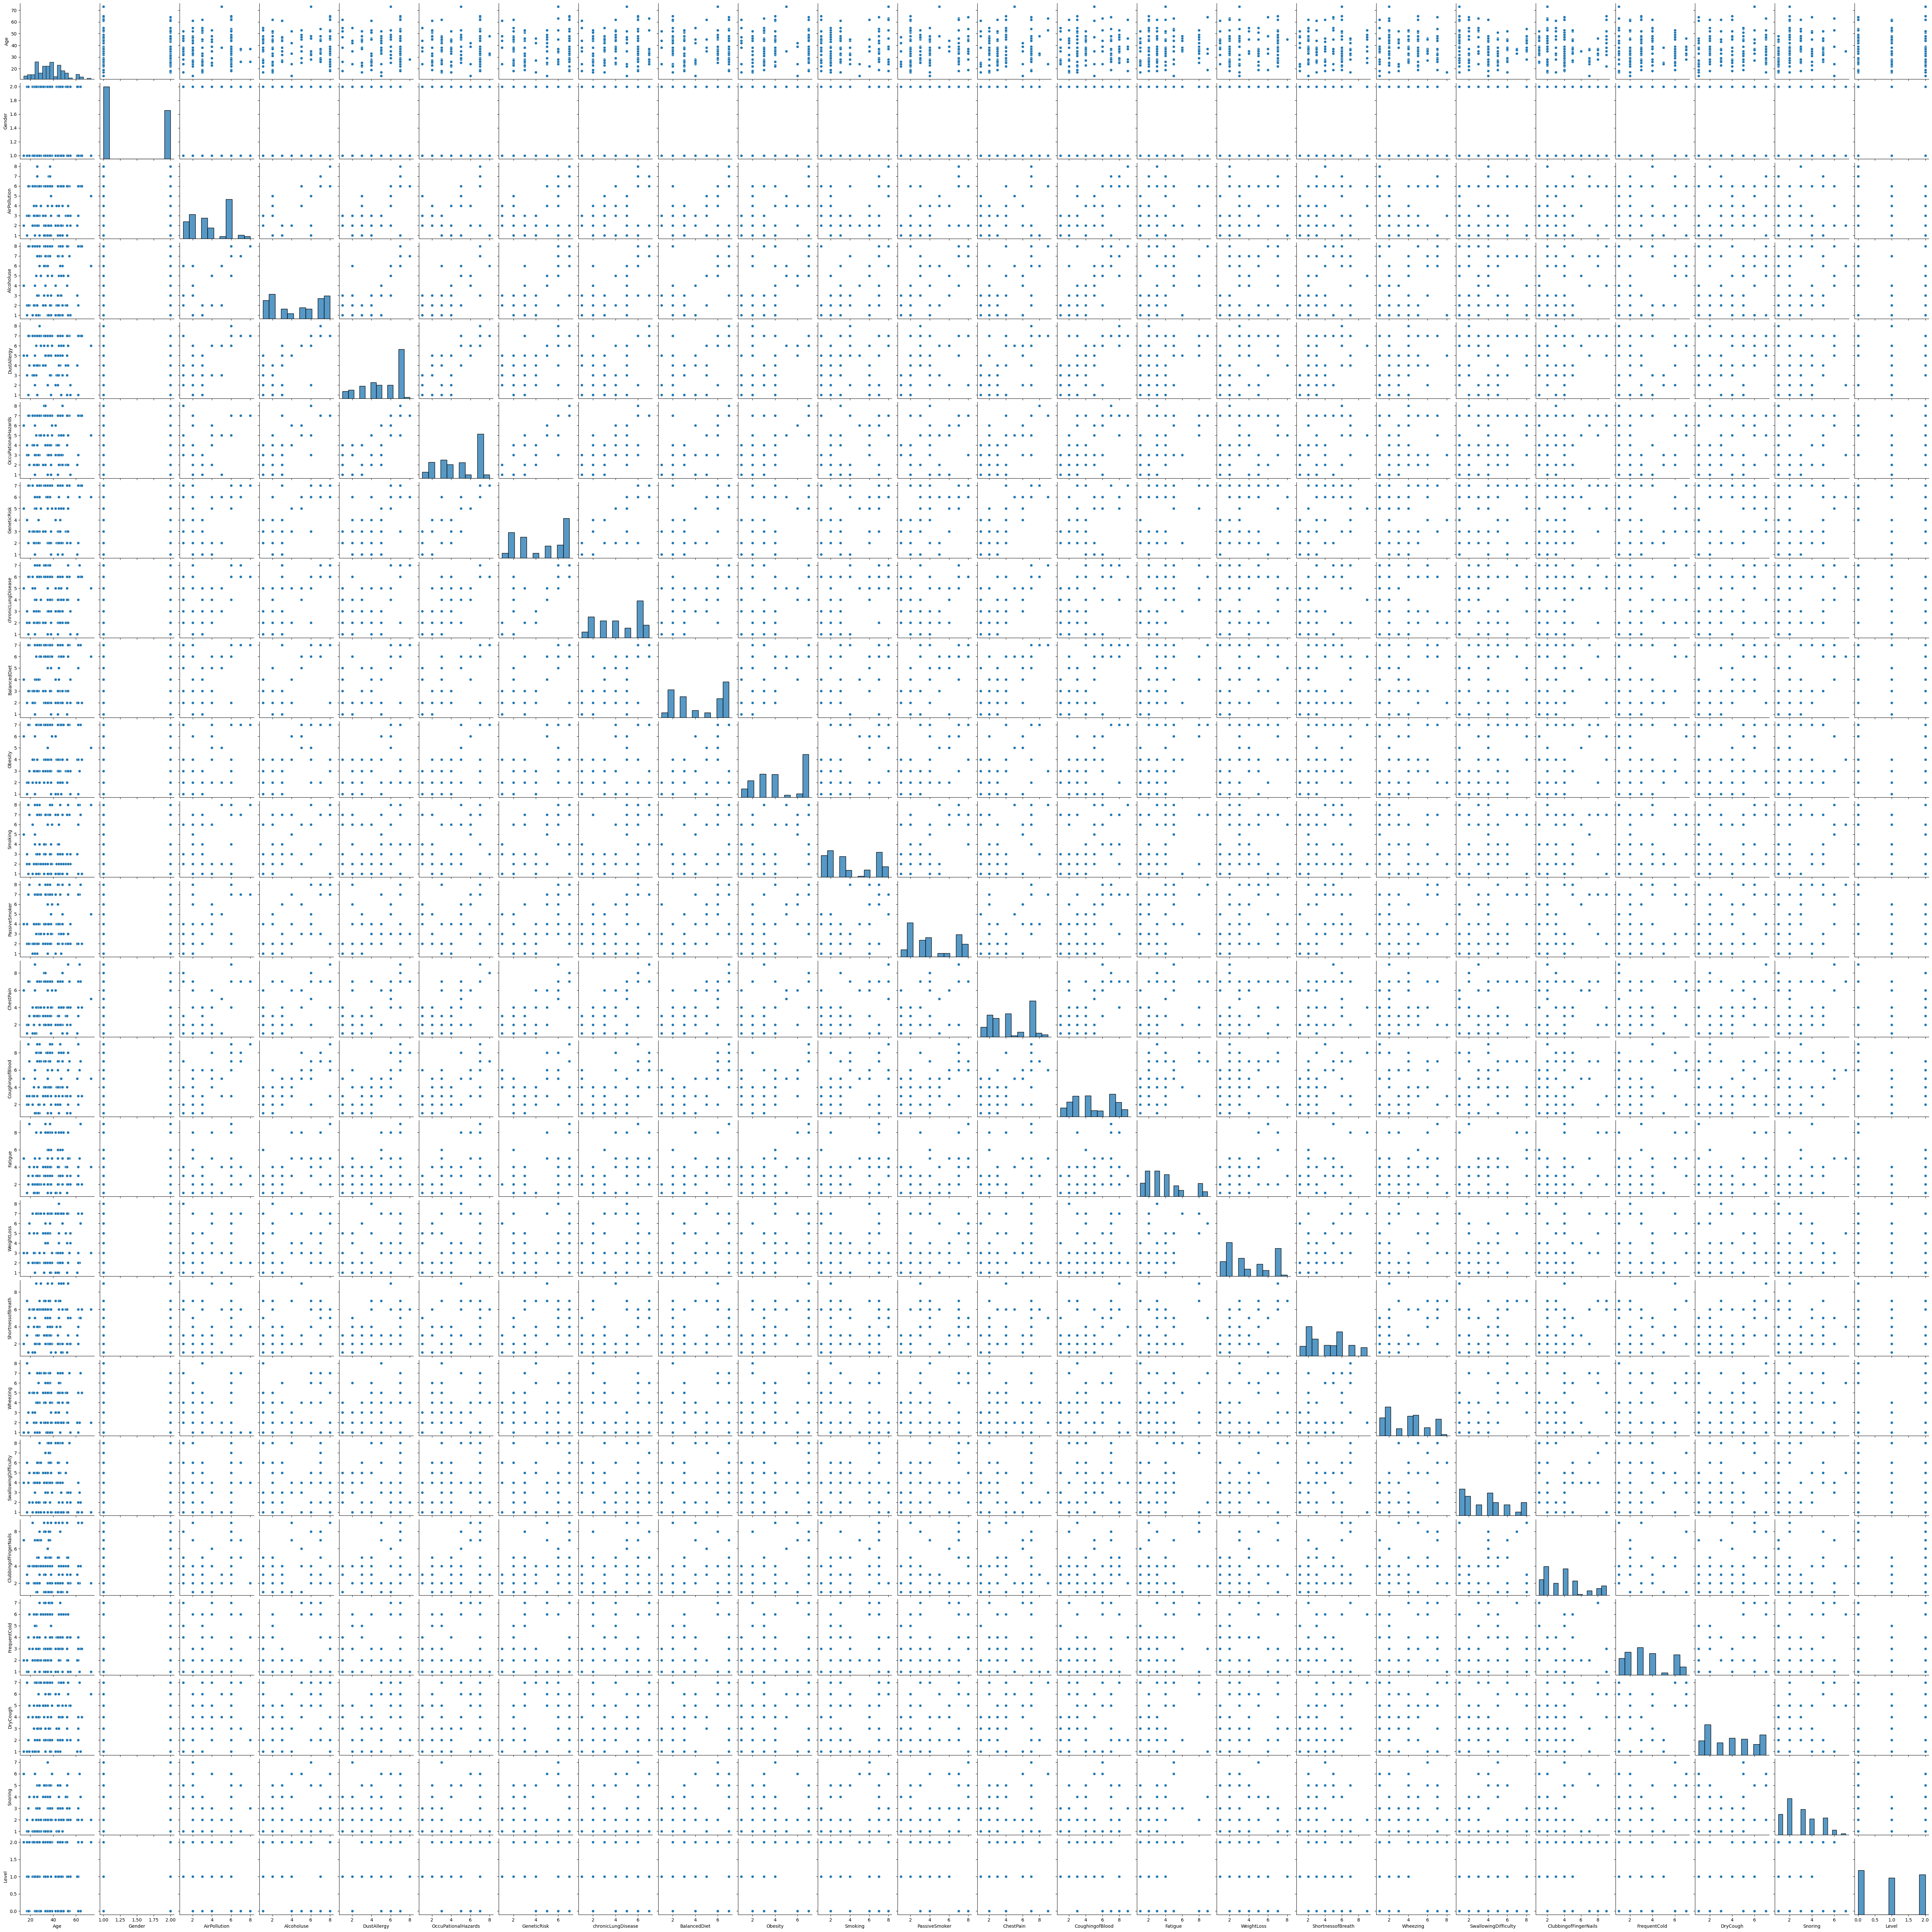

In [163]:
for feature in features:
    plt.figure(figsize=(10, 6))
    
    if cancer[feature].dtype == 'object' or cancer[feature].nunique() < 10:
        # Categorical variable: Use count plot
        sns.countplot(data=cancer, x=feature)
        plt.title(f'Count plot for {feature}')
    else:
        # Numerical variable: Use histogram
        sns.histplot(cancer[feature], kde=True, bins=30)
        plt.title(f'Histogram for {feature}')

    plt.show()
    
# Plot the target variable
plt.figure(figsize=(10, 6))

if cancer[target].dtype == 'object' or cancer[target].nunique() < 10:
    # Categorical target: Use count plot
    sns.countplot(data=cancer, x=target)
    plt.title(f'Count plot for {target}')
else:
    # Numerical target: Use histogram
    sns.histplot(cancer[target], kde=True, bins=30)
    plt.title(f'Histogram for {target}')

plt.show()

# Pair Plot (Optional): To see relationships between variables
sns.pairplot(cancer)
plt.show()

<Axes: >

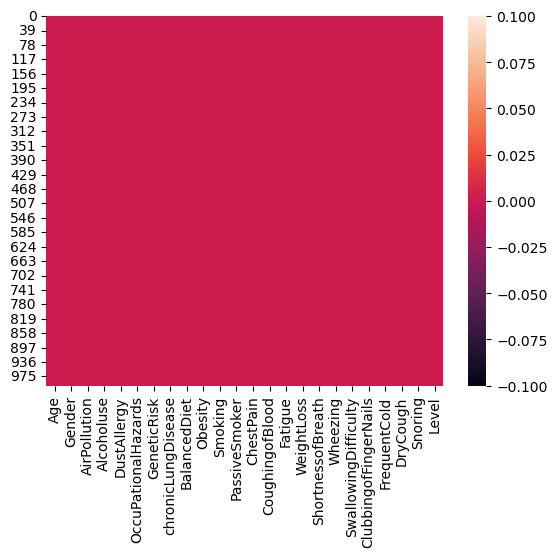

In [165]:
sns.heatmap(cancer.isnull())